In [14]:
import json
import asyncio
import aiohttp
import pandas as pd
import numpy as np
from understat import Understat
import nest_asyncio
nest_asyncio.apply()
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from mplsoccer.pitch import Pitch
plt.style.use('ggplot')
import os
from scipy.stats import binned_statistic_2d
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.colors

In [2]:
async def main():
    async with aiohttp.ClientSession() as session:
        understat = Understat(session)
        player_shots = await understat.get_player_shots(318)
        print(json.dumps(player_shots))
        with open('player_shots.json', 'w') as f:
            json.dump(player_shots, f)
        
loop = asyncio.get_event_loop()
loop.run_until_complete(main())

[{"id": "24383", "minute": "92", "result": "SavedShot", "X": "0.8780000305175781", "Y": "0.7169999694824218", "xG": "0.026291122660040855", "player": "Pierre-Emerick Aubameyang", "h_a": "h", "player_id": "318", "situation": "SetPiece", "season": "2014", "shotType": "RightFoot", "match_id": "5453", "h_team": "Borussia Dortmund", "a_team": "Bayer Leverkusen", "h_goals": "0", "a_goals": "2", "date": "2014-08-23 17:30:00", "player_assisted": "Jonas Hofmann", "lastAction": "Pass"}, {"id": "24657", "minute": "32", "result": "SavedShot", "X": "0.8540000152587891", "Y": "0.2610000038146973", "xG": "0.04662228748202324", "player": "Pierre-Emerick Aubameyang", "h_a": "a", "player_id": "318", "situation": "OpenPlay", "season": "2014", "shotType": "RightFoot", "match_id": "5456", "h_team": "Augsburg", "a_team": "Borussia Dortmund", "h_goals": "2", "a_goals": "3", "date": "2014-08-29 19:30:00", "player_assisted": "Marco Reus", "lastAction": "Pass"}, {"id": "24662", "minute": "39", "result": "SavedS

In [3]:
# async def main():
#     async with aiohttp.ClientSession() as session:
#         understat = Understat(session)
#         players = await understat.get_match_shots(14086)
#         print(json.dumps(players))
#         with open('players.json', 'w') as f:
#             json.dump(players, f)

# loop = asyncio.get_event_loop()
# loop.run_until_complete(main())


In [4]:
# consequently read the json and concatenate into a pre-defined dataframe
with open('./player_shots.json') as data_file:
    data = json.load(data_file)
    df = json_normalize(data, sep = '_')

In [5]:
df.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,24383,92,SavedShot,0.8780000305175781,0.7169999694824218,0.026291122660040855,Pierre-Emerick Aubameyang,h,318,SetPiece,2014,RightFoot,5453,Borussia Dortmund,Bayer Leverkusen,0,2,2014-08-23 17:30:00,Jonas Hofmann,Pass
1,24657,32,SavedShot,0.8540000152587891,0.2610000038146973,0.04662228748202324,Pierre-Emerick Aubameyang,a,318,OpenPlay,2014,RightFoot,5456,Augsburg,Borussia Dortmund,2,3,2014-08-29 19:30:00,Marco Reus,Pass
2,24662,39,SavedShot,0.9130000305175782,0.40299999237060546,0.07895559817552567,Pierre-Emerick Aubameyang,a,318,SetPiece,2014,RightFoot,5456,Augsburg,Borussia Dortmund,2,3,2014-08-29 19:30:00,Marco Reus,Chipped
3,24668,52,MissedShots,0.9259999847412109,0.5790000152587891,0.1399414837360382,Pierre-Emerick Aubameyang,a,318,OpenPlay,2014,RightFoot,5456,Augsburg,Borussia Dortmund,2,3,2014-08-29 19:30:00,Kevin Großkreutz,Pass
4,24674,75,SavedShot,0.904000015258789,0.6580000305175782,0.27392691373825073,Pierre-Emerick Aubameyang,a,318,OpenPlay,2014,RightFoot,5456,Augsburg,Borussia Dortmund,2,3,2014-08-29 19:30:00,Marco Reus,Pass


In [6]:
df[["X", "Y", "xG"]] = df[["X", "Y", "xG"]].apply(pd.to_numeric)

In [7]:
df['x_loc'] = df['X'] * 100
df['y_loc'] = df['Y'] * 100

In [18]:
mask = df['result']=='Goal'
df=df.loc[mask]
len(df)

140

In [9]:
df.dtypes

id                  object
minute              object
result              object
X                  float64
Y                  float64
xG                 float64
player              object
h_a                 object
player_id           object
situation           object
season              object
shotType            object
match_id            object
h_team              object
a_team              object
h_goals             object
a_goals             object
date                object
player_assisted     object
lastAction          object
x_loc              float64
y_loc              float64
dtype: object

In [10]:
pitch = Pitch(pitch_type='statsperform', figsize=(16, 12), #pad_left=-10, pad_right=-10, pad_bottom=-10,
              orientation='vertical', view='half', line_zorder=2)

In [11]:
pitch_range = [[pitch.left, pitch.right], [pitch.bottom, pitch.top]]
result = binned_statistic_2d(df.x_loc, df.y_loc, values=df.x_loc, statistic='count', bins=(53, 34), expand_binnumbers=True,
                             range=pitch_range)

In [12]:
cmap = ListedColormap(['#303640', '#800026', '#B60026', '#DA141E', '#F33C25', '#FC7134', '#FD9d43', '#FEBE59', '#FEDD7F', '#FFEFA4', '#FFFFCC'])

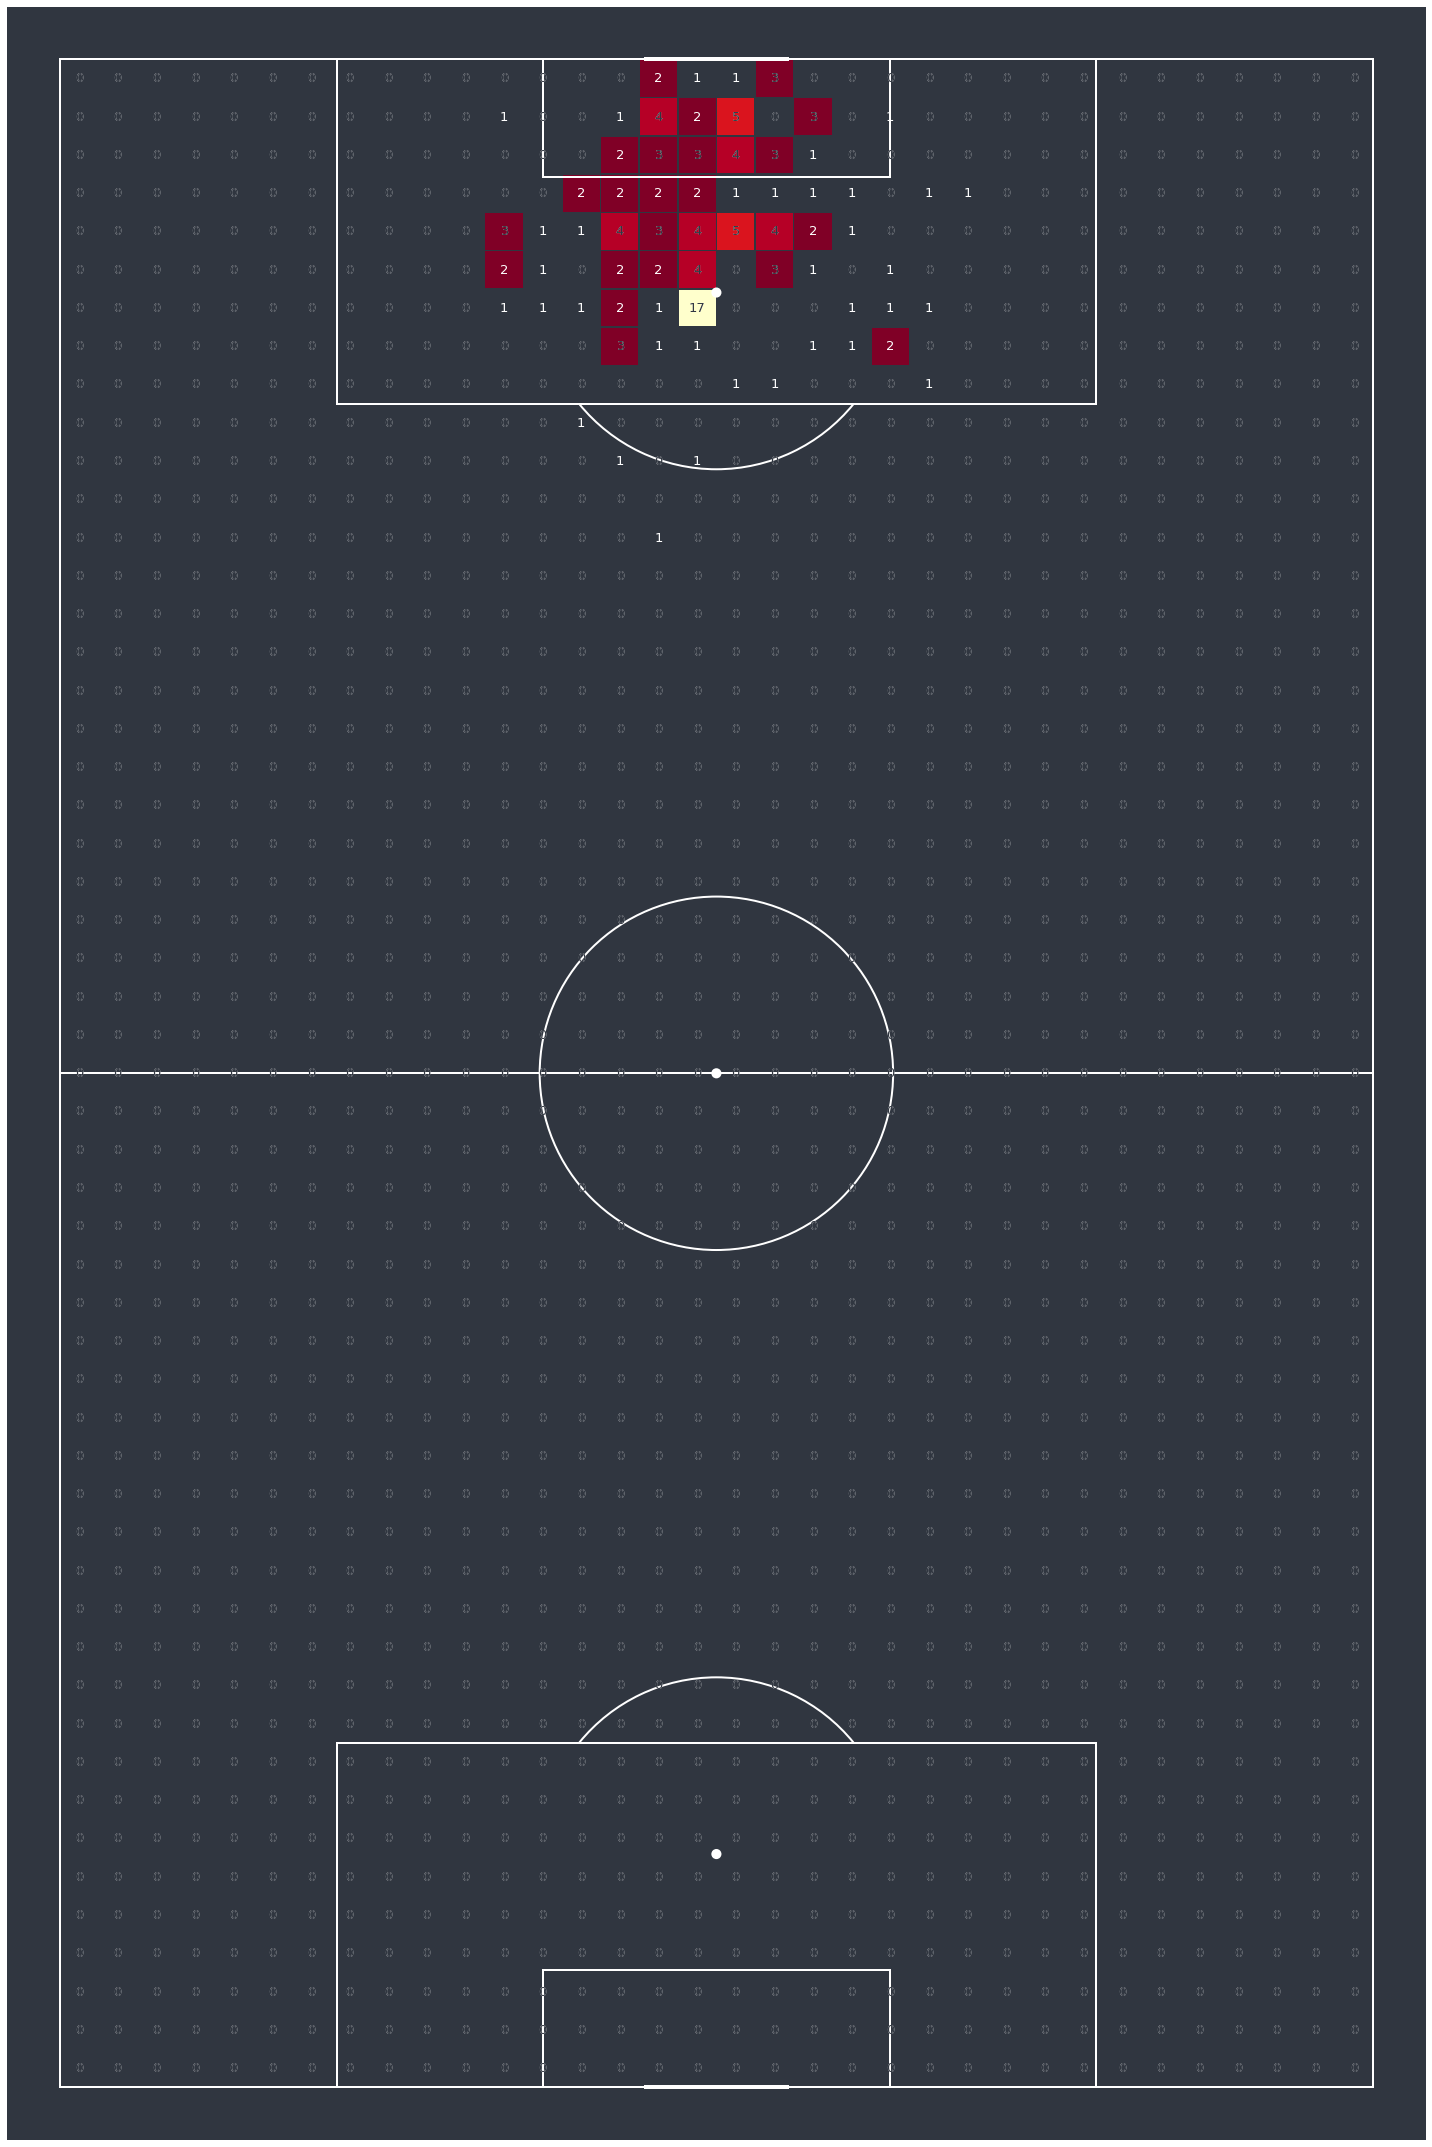

In [19]:
background = "#303640"

pitch = Pitch(pitch_color=background,pitch_type='opta', figsize=(20, 40),orientation='vertical',view='full', line_zorder=2)

fig, ax = pitch.draw()
bs = pitch.bin_statistic(df.x_loc, df.y_loc, statistic='count', bins=(53, 34))
pcm = pitch.heatmap(bs, ax=ax, cmap=cmap, edgecolors=background)
bs['statistic'] = np.nan_to_num(bs['statistic'])
bs['statistic'] = (bs['statistic']).astype(np.int32)
annotation = pitch.label_heatmap(bs, color='white', fontsize=13, ax=ax, ha='center', va='center', zorder=3)
mask = ((bs['statistic'] < 1) | (bs['statistic'] > 2))
bs['statistic'] = bs['statistic'].astype(str)
bs['statistic'][~mask] = ''
annotation = pitch.label_heatmap(bs, color=background, fontsize=13, ax=ax, ha='center', va='center', zorder=10)
plt.rcParams['axes.facecolor']=background
plt.rcParams['savefig.facecolor']=background
plt.savefig("goal-heatmap",bbox_inches="tight",dpi=100)
